In [180]:
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
data = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

# Data Cleaning

In [183]:
# Gaining an idea of how data is
data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [185]:
data.shape

(58645, 13)

In [187]:
# Checking for null values 
data.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [189]:
# Checking for data types 
# Need to convert Objects to ML ready variables (Int or Floats)
print(data.dtypes)
print('\n')
print('Object Features that need to be converted are:')
list(data.select_dtypes(include='object').columns)

id                              int64
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object


Object Features that need to be converted are:


['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [191]:
list(data.select_dtypes(include='object').columns)


['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [193]:
# Copying Data into data2 to keep source data untouched

data2 = data.copy()

In [195]:
# Converting each Object feature into ML friendly feature

# Identify unique variables for home ownership
print(data2['person_home_ownership'].unique())
print('\n')
print(data2['loan_intent'].unique())
print('\n')
print(data2['loan_grade'].unique())
print('\n')
print(data2['cb_person_default_on_file'].unique())

['RENT' 'OWN' 'MORTGAGE' 'OTHER']


['EDUCATION' 'MEDICAL' 'PERSONAL' 'VENTURE' 'DEBTCONSOLIDATION'
 'HOMEIMPROVEMENT']


['B' 'C' 'A' 'D' 'E' 'F' 'G']


['N' 'Y']


In [197]:
# THere are 89 Rows of OTHER 
data2[data2['person_home_ownership']=='OTHER']

# Drop "OTHER" since it represents less than 0.001% of the data
data2 = data2[data2['person_home_ownership']!='OTHER']

In [199]:
# Utilize LabelEncoder to encode the string objects
list(data2['loan_intent'].unique())

# Initialize labelEncoder 
encoder = LabelEncoder() 

# Fit and transform the data for 'loan_intent' column
data2['loan_intent'] = encoder.fit_transform(data2['loan_intent'])

# Fit and transform the data for 'loan_grade' column
data2['loan_grade'] = encoder.fit_transform(data2['loan_grade'])


# HOME OWNERSHIP DATA CLEANING

# Get Unique classes from the "person_home_ownership"
unique_values = data2['person_home_ownership'].unique()
home_ownership_dict = {i: unique_values[i] for i in range(len(unique_values))}

# Print the dictionary for reference
print("Dictionary for person_home_ownership classes:", home_ownership_dict)

# Fit and transform the data for 'person_home_ownership' column
data2['person_home_ownership'] = encoder.fit_transform(data2['person_home_ownership'])


# CB_PERSON_DEFAULT_ON_FILE

# Get Unique classes from the "person_home_ownership"
unique_values = data2['cb_person_default_on_file'].unique()
cb_person_default_on_file_dict = {i: unique_values[i] for i in range(len(unique_values))}

# Print the dictionary for reference
print("Dictionary for cb_person_default_on_file classes:", cb_person_default_on_file_dict)

# Fit and transform the data for 'person_home_ownership' column
data2['cb_person_default_on_file'] = encoder.fit_transform(data2['cb_person_default_on_file'])

data2.head()


Dictionary for person_home_ownership classes: {0: 'RENT', 1: 'OWN', 2: 'MORTGAGE'}
Dictionary for cb_person_default_on_file classes: {0: 'N', 1: 'Y'}


,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,2,0.0,1,1,6000,11.49,0.17,0,14,0
1,1,22,56000,1,6.0,3,2,4000,13.35,0.07,0,2,0
2,2,29,28800,1,8.0,4,0,6000,8.90,0.21,0,10,0
3,3,30,70000,2,14.0,5,1,12000,11.11,0.17,0,5,0
4,4,22,60000,2,2.0,3,0,6000,6.92,0.10,0,3,0


In [201]:
# Verifying Data types 
print(data2.dtypes)

print('\n')
print('Now that data cleaning is complete, time for data exploration')

id                              int64
person_age                      int64
person_income                   int64
person_home_ownership           int64
person_emp_length             float64
loan_intent                     int64
loan_grade                      int64
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file       int64
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object


Now that data cleaning is complete, time for data exploration


# Data Exploration

In [204]:
# Data distribution

data2.describe()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
count,58556.000000,58556.000000,5.855600e+04,58556.000000,58556.000000,58556.000000,58556.000000,58556.000000,58556.000000,58556.000000,58556.000000,58556.000000,58556.000000
mean,29322.958143,27.551523,6.404149e+04,1.098538,4.701209,2.518820,1.066347,9216.323724,10.676532,0.159229,0.148354,5.813819,0.142342
std,16929.710966,6.032287,3.793975e+04,0.967841,3.958525,1.722754,1.046092,5563.962614,3.035149,0.091697,0.355453,4.029183,0.349404
min,0.000000,20.000000,4.200000e+03,0.000000,0.000000,0.000000,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000,0.000000
25%,14660.750000,23.000000,4.200000e+04,0.000000,2.000000,1.000000,0.000000,5000.000000,7.880000,0.090000,0.000000,3.000000,0.000000
50%,29324.500000,26.000000,5.800000e+04,2.000000,4.000000,3.000000,1.000000,8000.000000,10.750000,0.140000,0.000000,4.000000,0.000000
75%,43987.250000,30.000000,7.560000e+04,2.000000,7.000000,4.000000,2.000000,12000.000000,12.990000,0.210000,0.000000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,2.000000,123.000000,5.000000,6.000000,35000.000000,23.220000,0.830000,1.000000,30.000000,1.000000


In [206]:
print('There are outliers here. For example, a 123 year old, working for 123 years? Need to drop some outliers ')

There are outliers here. For example, a 123 year old, working for 123 years? Need to drop some outliers 


<Figure size 1000x600 with 0 Axes>

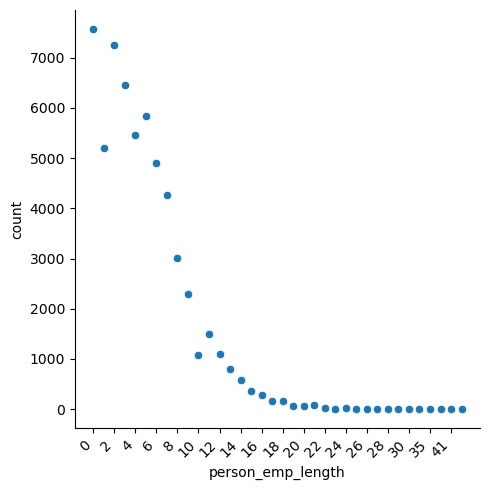

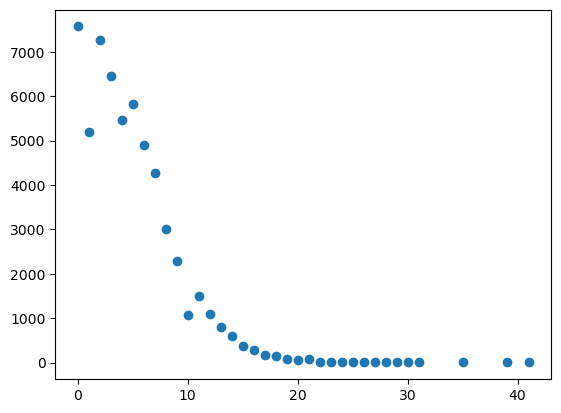

In [210]:
# Visually representing features that may have outliers

# Create the count dataframe
count_df = (data2['person_emp_length'].value_counts()).reset_index()
count_df.columns = ['person_emp_length','count']

# Convert float to int, then to string to remove ".0"
count_df['person_emp_length'] = count_df['person_emp_length'].astype(int).astype(str)

# Sort by employment length (as integer) if you want ordered x-axis
count_df = count_df.sort_values(by='person_emp_length', key=lambda x: x.astype(int))


# Set figure size
plt.figure(figsize=(10, 6))

# Plot using seaborn scatterplot
sns.relplot(x='person_emp_length', y='count', kind='scatter',data=count_df)
# Get current tick positions
xticks = plt.xticks()[0]
plt.xticks(ticks=xticks[::2], rotation=45, ha='right')
plt.tight_layout()
plt.show()


# # These two instances are outliers! 
data2[data2['person_emp_length'] > 122 ]

# Drop "Outliers" since it misrepresents data
data2 = data2[data2['person_emp_length'] != 123]
count_df = (data2['person_emp_length'].value_counts()).reset_index()
count_df.columns = ['person_emp_length','count']
plt.scatter(count_df['person_emp_length'],count_df['count'] )
plt.show()

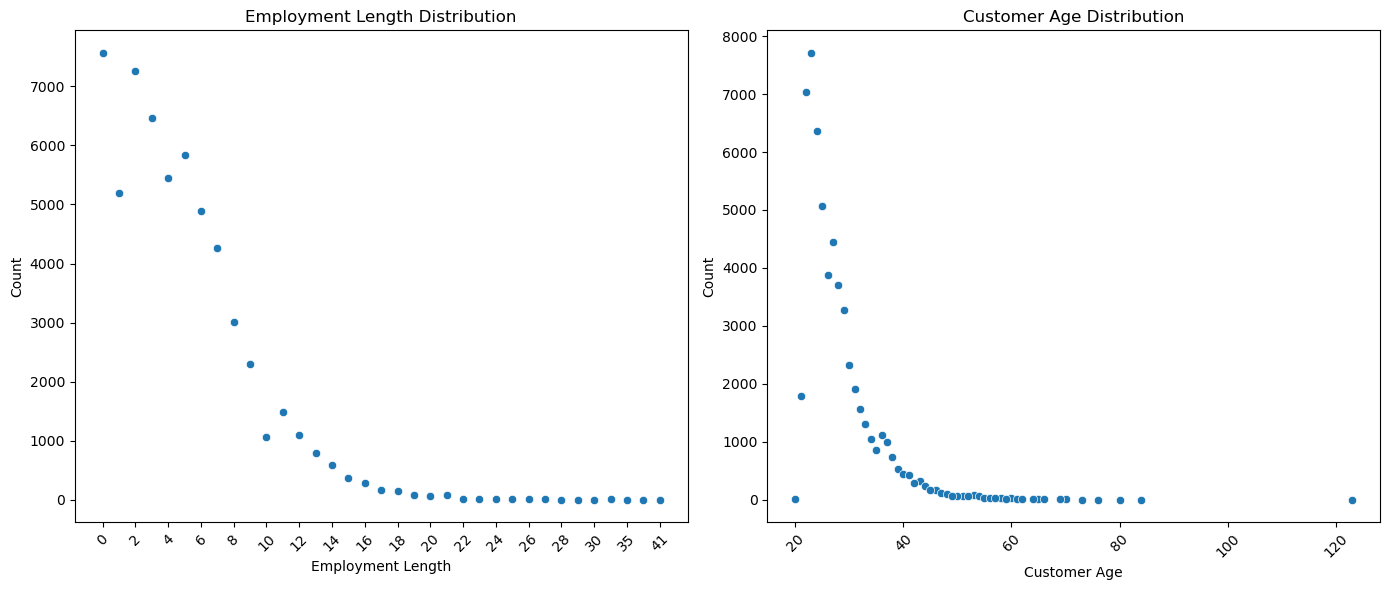

Now, the outliers have been removed. As shown in the graphs, as customer's age and employment length increases, there are less occurences of them getting loans.


This is expected, as its more difficult to get financing in retirement years, and usually older customers have savings/investments they can rely on, rather get getting a new loan 


In [236]:
import matplotlib.pyplot as plt
import seaborn as sns

# First: Clean up the data and remove outliers
data2_clean = data2[data2['person_emp_length'] != 123]

# Create count dataframes
count_df = data2_clean['person_emp_length'].value_counts().reset_index()
count_df.columns = ['person_emp_length', 'count']

count_df2 = data2_clean['person_age'].value_counts().reset_index()
count_df2.columns = ['person_age', 'count']

# Convert employment length to string for cleaner x-tick labels
count_df['person_emp_length'] = count_df['person_emp_length'].astype(int).astype(str)

# Sort by employment length
count_df = count_df.sort_values(by='person_emp_length', key=lambda x: x.astype(int))

# Set up 1 row, 2 column subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- First subplot: Employment Length
sns.scatterplot(x='person_emp_length', y='count', data=count_df, ax=axes[0])
axes[0].set_title("Employment Length Distribution")
axes[0].set_xlabel("Employment Length")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)

# Optional: Space out x-ticks if needed
xticks = axes[0].get_xticks()
axes[0].set_xticks(xticks[::2])

# --- Second subplot: Customer Age
sns.scatterplot(x='person_age', y='count', data=count_df2, ax=axes[1])
axes[1].set_title("Customer Age Distribution")
axes[1].set_xlabel("Customer Age")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# Drop "Outliers" since it misrepresents data
data2 = data2[data2['person_emp_length'] != 123]

print("Now, the outliers have been removed. As shown in the graphs, as customer's age and employment length increases, there are less occurences of them getting loans.")
print('\n')
print("This is expected, as its more difficult to get financing in retirement years, and usually older customers have savings/investments they can rely on, rather get getting a new loan ")

In [232]:
data2.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,2,0.0,1,1,6000,11.49,0.17,0,14,0
1,1,22,56000,1,6.0,3,2,4000,13.35,0.07,0,2,0
2,2,29,28800,1,8.0,4,0,6000,8.90,0.21,0,10,0
3,3,30,70000,2,14.0,5,1,12000,11.11,0.17,0,5,0
4,4,22,60000,2,2.0,3,0,6000,6.92,0.10,0,3,0


<Axes: >

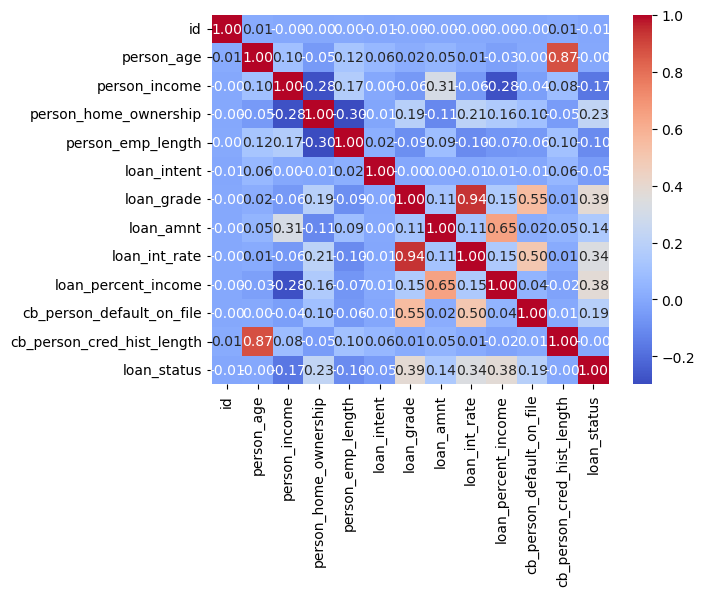

In [240]:
# Correlation Heatmap to understand better relationships

corr = data2.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)


KEY FINDING:
This heatmap can show which variables are correlated with one another.

1.) person's age and credit history length are highly positively correlated. This is logical which indicates the older a person is, the longer the credit history would typically be. 

2.) Loan Grade and Interest rate are almost perfectly correlated. If the loan grade is classified as being more risky, the interest rate would be higher, to compensate for the added risk taken on by the bank. 

3.) Loan interest rate and person default on file has a somewhat positive correlation. It can signify that as interest rates increase, it would be more difficult for a customer to pay back the loan. 

In [20]:
# Since this is a supervised, classification problem, the algorithms below will be used: 

# Rmbr, goal is to predict loan status. Will split this inital dataset into train/test,

# then, build a model, evaluate results. Afer that, use the model to predict the test dataset

# ML Algorithms




In [22]:
# LOGISTIC REGRESSION

# Split the dataset into features (x) and (y)
X = data2.drop(columns=['loan_status'])
y= data2['loan_status']



# Split the data into training and test datasets 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42) 

# Initialize and fit Logistic Model 
log_model = LogisticRegression(random_state = 42)
log_model.fit(X_train, y_train)


# Make Predictions 
y_pred = log_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print('\n')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Convert to a pandas DataFrame with labeled rows and columns
conf_matrix_df = pd.DataFrame(conf_matrix, index=['True', 'False'], columns=['Predicted True', 'Predicted False'])

print(conf_matrix_df)

print('\n')

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)



Accuracy: 0.8906156604901375


       Predicted True  Predicted False
True             9897              231
False            1050              533


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     10128
           1       0.70      0.34      0.45      1583

    accuracy                           0.89     11711
   macro avg       0.80      0.66      0.70     11711
weighted avg       0.88      0.89      0.87     11711



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
# LOGISTIC REGRESSION (With Grid Search)

# Split the dataset into features (x) and (y)
X = data2.drop(columns=['loan_status'])
y= data2['loan_status']


# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test datasets 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Hyperparameter grid to search over
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization types
    'solver': ['liblinear', 'saga'],  # Solvers
    'max_iter': [100, 200, 300]  # Number of iterations
}

log_model = LogisticRegression(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(log_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_log_model = grid_search.best_estimator_

# Make Predictions 
y_pred = best_log_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print('\n')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Convert to a pandas DataFrame with labeled rows and columns
conf_matrix_df = pd.DataFrame(conf_matrix, index=['True', 'False'], columns=['Predicted True', 'Predicted False'])

print(conf_matrix_df)

print('\n')

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)



Accuracy: 0.9021432840918794


       Predicted True  Predicted False
True             9885              243
False             903              680


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10128
           1       0.74      0.43      0.54      1583

    accuracy                           0.90     11711
   macro avg       0.83      0.70      0.74     11711
weighted avg       0.89      0.90      0.89     11711



Analysis: Class 1 (loan status being defaulted) may be higher because even though predictive features show the client unlikely to default, there may be other external factors that result in loan defaults. For example, family situations, unforeseen expenses, and any other datapoints that may not have been captured in the dataset.

In [25]:
test.head()
test.shape

(39098, 12)

In [26]:
# Data cleaning for test data

# # THere are 89 Rows of OTHER 
# test[test['person_home_ownership']=='OTHER']

# # Drop "OTHER" since it represents less than 0.001% of the data
# test =test[test['person_home_ownership']!='OTHER']


# Utilize LabelEncoder to encode the string objects
list(test['loan_intent'].unique())

# Initialize labelEncoder 
encoder = LabelEncoder() 

# Fit and transform the data for 'loan_intent' column
test['loan_intent'] = encoder.fit_transform(test['loan_intent'])

# Fit and transform the data for 'loan_grade' column
test['loan_grade'] = encoder.fit_transform(test['loan_grade'])


# HOME OWNERSHIP DATA CLEANING

# Get Unique classes from the "person_home_ownership"
unique_values = test['person_home_ownership'].unique()
home_ownership_dict = {i: unique_values[i] for i in range(len(unique_values))}

# Print the dictionary for reference
print("Dictionary for person_home_ownership classes:", home_ownership_dict)

# Fit and transform the data for 'person_home_ownership' column
test['person_home_ownership'] = encoder.fit_transform(test['person_home_ownership'])


# CB_PERSON_DEFAULT_ON_FILE

# Get Unique classes from the "person_home_ownership"
unique_values = test['cb_person_default_on_file'].unique()
cb_person_default_on_file_dict = {i: unique_values[i] for i in range(len(unique_values))}

# Print the dictionary for reference
print("Dictionary for cb_person_default_on_file classes:", cb_person_default_on_file_dict)

# Fit and transform the data for 'person_home_ownership' column
test['cb_person_default_on_file'] = encoder.fit_transform(test['cb_person_default_on_file'])

test.head()


Dictionary for person_home_ownership classes: {0: 'RENT', 1: 'MORTGAGE', 2: 'OWN', 3: 'OTHER'}
Dictionary for cb_person_default_on_file classes: {0: 'N', 1: 'Y'}


,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,3,3.0,2,5,25000,15.76,0.36,0,2
1,58646,26,96000,0,6.0,4,2,10000,12.68,0.10,1,4
2,58647,26,30000,3,5.0,5,4,4000,17.19,0.13,1,2
3,58648,33,50000,3,4.0,0,0,7000,8.90,0.14,0,7
4,58649,26,102000,0,8.0,2,3,15000,16.32,0.15,1,4


Test dataset was preprocessed, now will prep for the model itself, to predict target variable 

In [28]:
# Drop the target column if it exists in the test dataset
X_test = test.drop(columns=['loan_status'], errors='ignore')  # Drop target if it exists

# Step 1: Apply same preprocessing to test dataset (same scaling as used for training data)
test_data_scaled = scaler.transform(X_test)

# Step 2: Use the trained model to make predictions on the test dataset
y_pred_test = best_log_model.predict(test_data_scaled)

# Step 3: If needed, store the predictions (optional)
test['loan_status'] = y_pred_test

# Print the predictions or use it as needed
print(test[['loan_status']].head())

   loan_status
0            1
1            0
2            1
3            0
4            0


In [29]:
# Step 1: Create submission dataframe 
submission = test[['id','loan_status']]
submission.set_index('id', inplace= True)

# Step 2: Export the dataframe as CSV File 
submission.to_csv('submission.csv')

print(submission.head())


       loan_status
id                
58645            1
58646            0
58647            1
58648            0
58649            0


In [56]:
# RandomForest Classifier
# Split the dataset into features (x) and (y)
X = data2.drop(columns=['loan_status'])
y= data2['loan_status']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and fit the RandomForest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Hyperparameter grid to search over
param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of each tree
    'min_samples_split':[None, 2, 5 ],  # Minimum samples required to split an internal node
    'min_samples_leaf':[None, 1, 2, 5],  # Minimum samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider for the best split
    'bootstrap': [True, False],  # Whether bootstrap samples are used when building trees
}


# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_log_model = grid_search.best_estimator_

# Make Predictions
y_pred = best_log_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print('\n')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Convert to a pandas DataFrame with labeled rows and columns
conf_matrix_df = pd.DataFrame(conf_matrix, index=['True', 'False'], columns=['Predicted True', 'Predicted False'])

print(conf_matrix_df)

print('\n')

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)


/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
648 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
324 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/

Accuracy: 0.9549995730509777


       Predicted True  Predicted False
True            10042               86
False             441             1142


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10128
           1       0.93      0.72      0.81      1583

    accuracy                           0.95     11711
   macro avg       0.94      0.86      0.89     11711
weighted avg       0.95      0.95      0.95     11711



In [58]:
# Step 2: Use the trained model to make predictions on the test dataset
y_pred_test = best_log_model.predict(test_data_scaled)

# Step 3: If needed, store the predictions (optional)
test['loan_status'] = y_pred_test

# Print the predictions or use it as needed
print(test[['loan_status']].head())


# Step 1: Create submission dataframe 
submission = test[['id','loan_status']]
submission.set_index('id', inplace= True)

# Step 2: Export the dataframe as CSV File 
submission.to_csv('submission.csv')

print(submission.head())

   loan_status
0            1
1            0
2            0
3            0
4            0
       loan_status
id                
58645            1
58646            0
58647            0
58648            0
58649            0
